# Deep learning entry task
 <img src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg" align="right" width="200px"/>

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/en/igp),  
[The Technical University of Braunschweig  ](https://www.tu-braunschweig.de/en/)  
Instructors: [Dr. -Ing. Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) and [Dr. Pedro Diaz](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz)
<br clear="left"/>

## 1. Import all necessary packages

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np

<IPython.core.display.Javascript object>

## 2. Load the Fashion MNIST dataset for image classification
Create three disjoint sets: train, validation and test.

In [3]:
# Load the Fashion MNIST dataset and split it into training, validation, and test sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

<IPython.core.display.Javascript object>

In [4]:
# Normalize the pixel values to the range [0, 1]
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

<IPython.core.display.Javascript object>

## 3. Create a Multi Layer Perceptron (MLP) for image classification.
Feel free to use any configuration and framework for its implementation (Keras, Tensorflow, Pytorch, etc.)

In [5]:
# Define the MLP model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])




<IPython.core.display.Javascript object>

In [6]:
# Compile the model with optimizer, loss function, and metrics
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

<IPython.core.display.Javascript object>

## 4. Train the model
During training, perform a hyperparameter tuning to find the best learning rate from a set of learning rates (1D grid search).

In [7]:
# Define a set of learning rates to search over
learning_rates = [1e-2, 1e-3, 1e-4]

# Train and evaluate the model for each learning rate, and choose the best one
best_lr, best_acc = None, 0.0
for lr in learning_rates:
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    history = model.fit(
        X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), verbose=0
    )
    val_acc = history.history["val_accuracy"][-1]
    if val_acc > best_acc:
        best_acc = val_acc
        best_lr = lr
    print("Learning rate:", lr, "Validation accuracy:", val_acc)

Learning rate: 0.01 Validation accuracy: 0.8556666374206543
Learning rate: 0.001 Validation accuracy: 0.8853333592414856
Learning rate: 0.0001 Validation accuracy: 0.8840000033378601


<IPython.core.display.Javascript object>

In [8]:
# Use early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=10)

# Train the model again using the best learning rate and evaluate on the test set
optimizer = keras.optimizers.Adam(learning_rate=best_lr)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


<IPython.core.display.Javascript object>

In [9]:
history = model.fit(X_train, y_train, epochs=200,callbacks=[early_stopping], validation_data=(X_valid, y_valid), verbose=0)


<IPython.core.display.Javascript object>

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Best learning rate: {best_lr}")
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8739
Best learning rate: 0.001
Test accuracy: 0.8738999962806702


<IPython.core.display.Javascript object>

## 5. Plots
Plot the evolution of the Loss function and Accuracy values over the epochs during training.

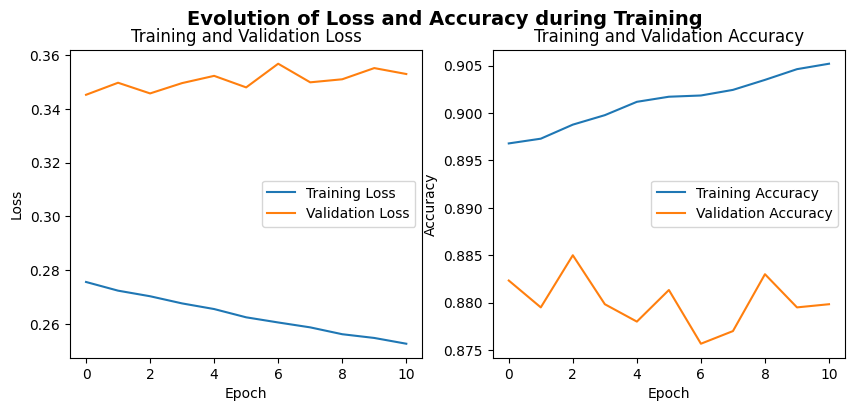

<IPython.core.display.Javascript object>

In [11]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the evolution of the loss function over the epochs during training
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].legend()

# Plot the evolution of the accuracy values over the epochs during training
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].legend()

# Add a main title to the figure
fig.suptitle('Evolution of Loss and Accuracy during Training', fontsize=14, fontweight='bold')

# Display the figure
plt.show()


## 6. Run inference
Run inference in the test set and compute the metrics for testing.

In [12]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Compute the metrics for testing
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


313/313 [==============================] - 0s 1ms/step
Test accuracy: 0.8739


<IPython.core.display.Javascript object>

## 7. Test samples
Show some samples from the test set: image, reference class and predicted class.

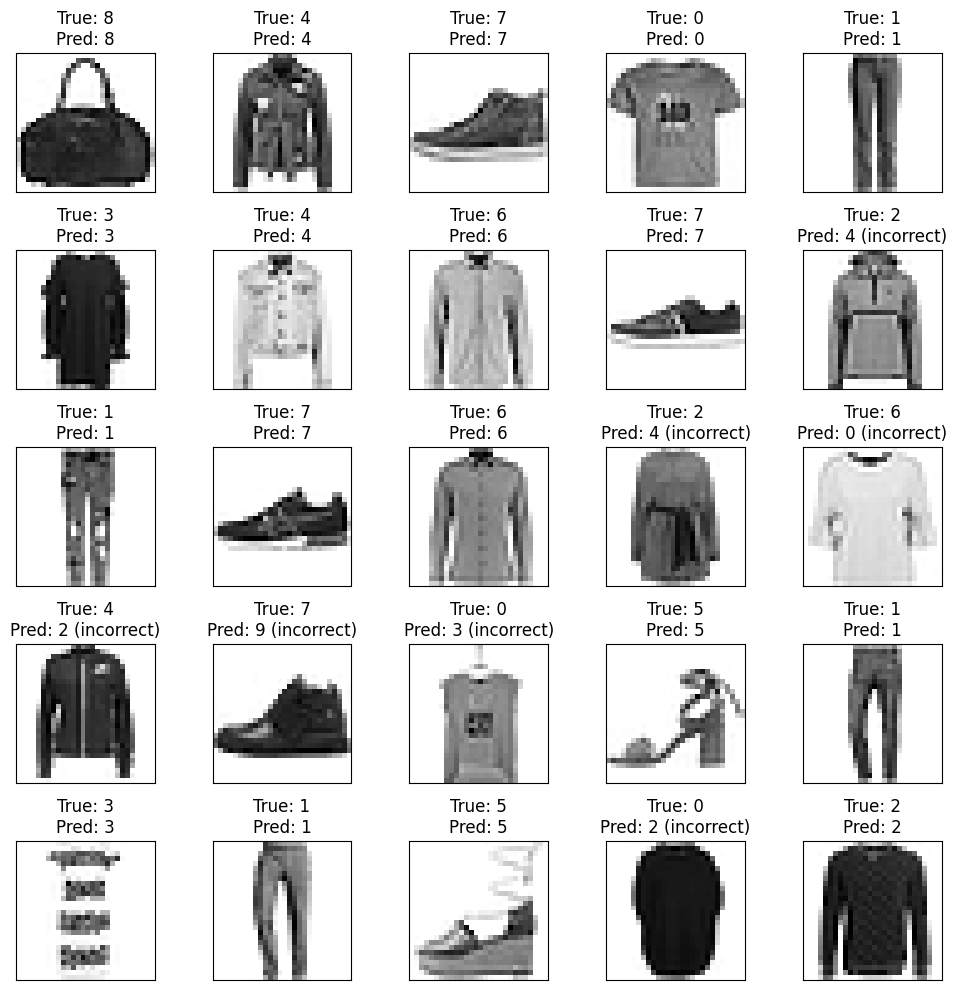

<IPython.core.display.Javascript object>

In [13]:
# Show a random sample of images from the test set with their true and predicted labels
num_samples = 25
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[idx], cmap=plt.cm.binary)
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    title = "True: {}\nPred: {}".format(true_label, pred_label)
    if true_label != pred_label:
        title += " (incorrect)"
    plt.title(title)
plt.tight_layout()
plt.show()


## 8. Testing with new image
Test the model with another image (from internet or take a photo with your phone). Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$. 

Comment the results.

In [14]:
# Load the new image
try:
    img = cv2.imread('img/img_1.jpg', cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image file could not be loaded")
except Exception as e:
    print("Error loading image file:", str(e))
    exit()

# Resize the image to 28x28 pixels
img = cv2.resize(img, (28, 28))



<IPython.core.display.Javascript object>

In [15]:
# Invert the image (Fashion MNIST images have white background and black foreground)
img = cv2.bitwise_not(img)

# Normalize the pixel values to the range [0, 1]
img = img / 255.0

# Reshape the image to have a single channel (required by the model)
img = img.reshape((1, 28, 28, 1))



<IPython.core.display.Javascript object>

In [16]:
# Get the predicted class probabilities
pred_probs = model.predict(img)[0]

# Get the index of the predicted class
pred_class = np.argmax(pred_probs)



1/1 [==============================] - 0s 55ms/step


<IPython.core.display.Javascript object>

In [17]:
# Print the predicted class and the corresponding label name
label_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
print("Predicted class:", pred_class)
print("Label name:", label_names[pred_class])

Predicted class: 2
Label name: Pullover


<IPython.core.display.Javascript object>

## 9. How could we improve the trained model?

Increase epochs for longer training: model.fit(X_train, y_train, epochs=50)

Add more layers to the model: model.add(Dense(128, activation='relu'))

Use a different optimization algorithm: model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Use data augmentation: datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

Use transfer learning: base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Use a different network architecture: model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), MaxPooling2D((2, 2)), Flatten(), Dense(10, activation='softmax')])

Use an ensemble of models: model1 = create_model1(); model2 = create_model2(); model3 = create_model3(); ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)], voting='soft')

Increase the size of the training set: train_data_augmented = generate_augmented_data(train_data, n_augmentations=10)

Fine-tune hyperparameters: grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)